In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

LOAD DATA

In [5]:
data = pd.read_csv('C:\\Users\\danie\\Downloads\\archive (1)\\car data.csv')
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


ENDOCING THE CATEGORICAL DATA

In [8]:
data.replace({'Fuel_Type':{'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace= True)
data.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace= True)
data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace= True)

In [9]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


SPLITTING DATA FOR TRAIN/TESTING

In [11]:
X = data.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = data['Selling_Price']

In [12]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state= 2)

In [14]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


TRAINING MODEL

In [25]:
lin_reg = LinearRegression()

In [37]:
history1= lin_reg.fit(X_train, Y_train)
history1

LinearRegression()

MODEL EVALUATION

In [28]:
training_data_pred = lin_reg.predict(X_train)


In [29]:
error_score = metrics.r2_score(Y_train, training_data_pred)
print('R squared Error:', error_score)

R squared Error: 0.8799451660493708


VISUALIZATION

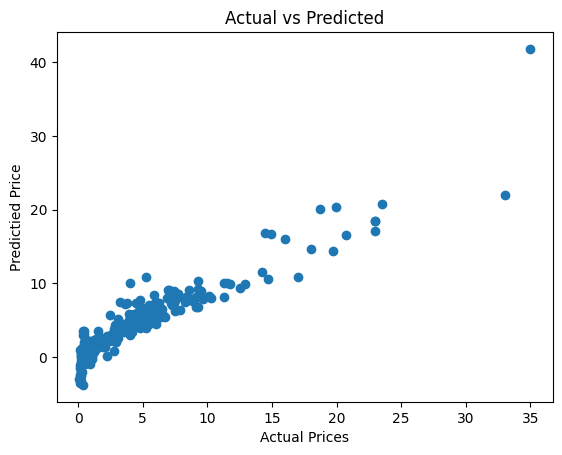

In [31]:
plt.scatter(Y_train, training_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predictied Price')
plt.title('Actual vs Predicted')
plt.show()

In [33]:
test_data_pred = lin_reg.predict(X_test)
test_error_score = metrics.r2_score(Y_test, test_data_pred)
print("R squared error:", test_error_score)

R squared error: 0.8365766715026374


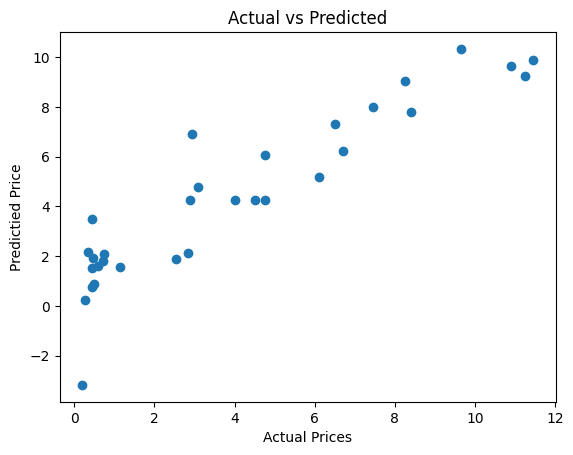

In [34]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predictied Price')
plt.title('Actual vs Predicted')
plt.show()

In [39]:
import joblib
joblib.dump(history1, 'model_joblib.pkl')

['model_joblib.pkl']

In [40]:
classifier = joblib.load('model_joblib.pkl')

In [41]:
new_obs = X_test

In [42]:
classifier.predict(new_obs)

array([10.32892855,  0.77165673,  4.26482324,  4.78985002,  9.88701568,
        4.24823193,  6.92536953,  7.29321065,  0.21950514,  5.18527582,
        6.23823964,  6.07761019,  2.1716932 ,  7.77611973,  1.89987958,
        1.79635895,  2.10001123,  1.91953211,  9.24977006,  4.25291486,
        1.569912  ,  9.04949049,  1.52561157,  9.65418587,  0.89631315,
        7.99187626,  1.59929505, -3.17680912,  4.24653988,  2.1257015 ,
        3.49654935])

In [16]:
Y_test

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64

In [15]:
X_test

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
99,2010,20.450,50024,1,0,0,0
161,2014,0.826,23000,0,1,0,0
89,2014,6.760,40000,0,0,0,0
30,2012,5.980,51439,1,0,0,0
232,2015,14.790,12900,0,0,1,0
290,2014,6.400,19000,0,0,0,0
35,2011,7.740,49998,2,0,0,0
7,2015,8.610,33429,1,0,0,0
183,2013,0.470,21000,0,1,0,0
13,2015,7.710,26000,0,0,0,0
